In [1]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

lang = 'english'

In [2]:
psblog = pd.read_csv("../../../Data/Final Dataset /PSBlog/PSBlog_Final.csv")

print(psblog.head())

         Author                         Timestamp  \
0      engobruh  December 13, 2023 at 8:49 am PST   
1     Tim102597  December 13, 2023 at 8:53 am PST   
2    cyberpangu  December 13, 2023 at 8:54 am PST   
3     StingrayX  December 13, 2023 at 8:55 am PST   
4  Prosopopoico  December 13, 2023 at 8:56 am PST   

                                             Comment  \
0                                  Finally, quality.   
1  Anyone else had buzz listing year star command...   
2  I would be happier if it was Ride 5 instead of...   
3                                       Solid month!   
4  Awesome month! But I just purchased GTAV last ...   

                                        Article Link Platform  
0  https://blog.playstation.com/2023/12/13/playst...  PS Plus  
1  https://blog.playstation.com/2023/12/13/playst...  PS Plus  
2  https://blog.playstation.com/2023/12/13/playst...  PS Plus  
3  https://blog.playstation.com/2023/12/13/playst...  PS Plus  
4  https://blog.playstat

In [3]:
print(psblog.shape)
print(psblog.columns)

(13350, 5)
Index(['Author', 'Timestamp', 'Comment', 'Article Link', 'Platform'], dtype='object')


In [4]:
psblog_comments = psblog['Comment']
psblog_comments = psblog_comments.str.lower()
psblog_comments = psblog_comments.str.cat(sep=' ')

print(psblog_comments[:100])

finally, quality. anyone else had buzz listing year star command as a kid? i remember i got it for c


In [5]:
regex = re.compile('[%s]' % re.escape(string.punctuation))
psblog_comments = regex.sub('', psblog_comments)

print(psblog_comments[:100])

finally quality anyone else had buzz listing year star command as a kid i remember i got it for chri


In [6]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]{2,}')

In [7]:
tokenized_psblog_comments = tokenizer.tokenize(psblog_comments)

print(tokenized_psblog_comments[:100])
print(len(tokenized_psblog_comments))

['finally', 'quality', 'anyone', 'else', 'had', 'buzz', 'listing', 'year', 'star', 'command', 'as', 'kid', 'remember', 'got', 'it', 'for', 'christmas', 'but', 'never', 'finished', 'it', 'because', 'got', 'stuck', 'on', 'one', 'of', 'the', 'levels', 'would', 'be', 'happier', 'if', 'it', 'was', 'ride', 'instead', 'of', 'moto', 'gp', 'but', 'it', 'okay', 'solid', 'month', 'awesome', 'month', 'but', 'just', 'purchased', 'gtav', 'last', 'week', 'it', 'is', 'possible', 'to', 'apply', 'for', 'refund', 'if', 'knew', 'it', 'was', 'going', 'to', 'be', 'on', 'the', 'catalog', 'would', 'had', 'never', 'bought', 'it', 'if', 'you', 'played', 'over', 'two', 'hours', 'you', 'can', 'get', 'refund', 'you', 'have', 'perpetual', 'license', 'to', 'the', 'game', 'which', 'is', 'great', 'because', 'it', 'not', 'tied', 'to']
415810


In [8]:
lemmatizer = WordNetLemmatizer()

In [9]:
lemmatized_psblog_comments = [lemmatizer.lemmatize(token) for token in tokenized_psblog_comments]

print(lemmatized_psblog_comments[:100])
print(len(lemmatized_psblog_comments))

['finally', 'quality', 'anyone', 'else', 'had', 'buzz', 'listing', 'year', 'star', 'command', 'a', 'kid', 'remember', 'got', 'it', 'for', 'christmas', 'but', 'never', 'finished', 'it', 'because', 'got', 'stuck', 'on', 'one', 'of', 'the', 'level', 'would', 'be', 'happier', 'if', 'it', 'wa', 'ride', 'instead', 'of', 'moto', 'gp', 'but', 'it', 'okay', 'solid', 'month', 'awesome', 'month', 'but', 'just', 'purchased', 'gtav', 'last', 'week', 'it', 'is', 'possible', 'to', 'apply', 'for', 'refund', 'if', 'knew', 'it', 'wa', 'going', 'to', 'be', 'on', 'the', 'catalog', 'would', 'had', 'never', 'bought', 'it', 'if', 'you', 'played', 'over', 'two', 'hour', 'you', 'can', 'get', 'refund', 'you', 'have', 'perpetual', 'license', 'to', 'the', 'game', 'which', 'is', 'great', 'because', 'it', 'not', 'tied', 'to']
415810


In [10]:
stopwords = set(stopwords.words(lang))

In [11]:
cleaned_psblog_comments = [token for token in lemmatized_psblog_comments if token not in stopwords]

print(cleaned_psblog_comments[:100])
print(len(cleaned_psblog_comments))

['finally', 'quality', 'anyone', 'else', 'buzz', 'listing', 'year', 'star', 'command', 'kid', 'remember', 'got', 'christmas', 'never', 'finished', 'got', 'stuck', 'one', 'level', 'would', 'happier', 'wa', 'ride', 'instead', 'moto', 'gp', 'okay', 'solid', 'month', 'awesome', 'month', 'purchased', 'gtav', 'last', 'week', 'possible', 'apply', 'refund', 'knew', 'wa', 'going', 'catalog', 'would', 'never', 'bought', 'played', 'two', 'hour', 'get', 'refund', 'perpetual', 'license', 'game', 'great', 'tied', 'subscription', 'probably', 'eligible', 'refund', 'probably', 'get', 'refund', 'think', 'would', 'want', 'one', 'actually', 'rockstar', 'seem', 'like', 'add', 'game', 'subscription', 'service', 'temporarily', 'red', 'dead', 'ha', 'p', 'plusnow', 'game', 'pas', 'month', 'gta', 'trilogy', 'game', 'gtav', 'le', 'month', 'watch', 'say', 'bought', 'accident', 'little', 'brother', 'bought', 'without', 'consent', 'also', 'tell']
236701


In [12]:
freq_dist = FreqDist(cleaned_psblog_comments)

In [13]:
freq_dist.most_common(15)

[('game', 8451),
 ('p', 6654),
 ('like', 2113),
 ('wa', 1983),
 ('play', 1873),
 ('one', 1549),
 ('get', 1462),
 ('sony', 1422),
 ('playstation', 1398),
 ('would', 1359),
 ('year', 1236),
 ('time', 1143),
 ('look', 1059),
 ('really', 1041),
 ('good', 1033)]

In [14]:
bigrams = ngrams(cleaned_psblog_comments, 2)

print(list(bigrams)[:10])

[('finally', 'quality'), ('quality', 'anyone'), ('anyone', 'else'), ('else', 'buzz'), ('buzz', 'listing'), ('listing', 'year'), ('year', 'star'), ('star', 'command'), ('command', 'kid'), ('kid', 'remember')]


In [15]:
bigrams_list = ngrams(cleaned_psblog_comments, 2)
bigram_count = Counter(bigrams_list)

In [16]:
print(bigram_count.most_common(15))

[(('p', 'game'), 450), (('p', 'p'), 449), (('p', 'plus'), 443), (('looking', 'forward'), 295), (('game', 'p'), 267), (('game', 'like'), 195), (('p', 'version'), 192), (('look', 'like'), 187), (('remote', 'play'), 181), (('please', 'add'), 159), (('game', 'wa'), 150), (('resident', 'evil'), 147), (('play', 'game'), 147), (('game', 'look'), 140), (('day', 'one'), 132)]


In [17]:
bigrams, counts = zip(*bigram_count.most_common(20))

In [18]:
bigram_labels = [' '.join(bigram) for bigram in bigrams]

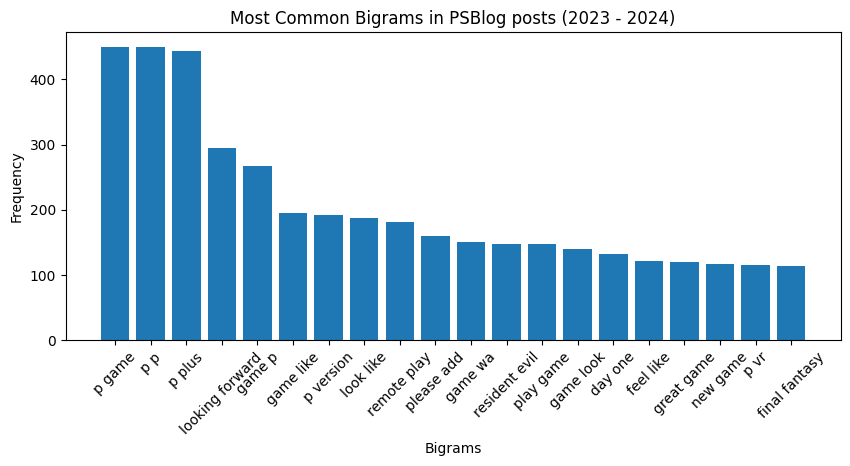

In [19]:
plt.figure(figsize=(10, 4))
plt.bar(bigram_labels, counts)
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Most Common Bigrams in PSBlog posts (2023 - 2024)')
plt.xticks(rotation=45)
plt.show()